In [ ]:
import random

def generate_random_order(mid_price, price_deviation=4, min_quantity=1, max_quantity=100):
  """
  Generates a random order with a realistic price and quantity.

  Args:
    mid_price: The current mid-price of the asset.
    price_deviation: The maximum deviation from the mid-price for order prices.
    min_quantity: The minimum order quantity.
    max_quantity: The maximum order quantity.

  Returns:
    A dictionary representing the order: {'side': order_type, 'price': price, 'quantity': quantity}
  """

  order_type = random.choice(['buy', 'sell'])

  if order_type == 'buy':
    price = random.randint(mid_price - price_deviation, mid_price)
  else:
    price = random.randint(mid_price, mid_price + price_deviation)

  quantity = random.randint(min_quantity, max_quantity)

  return {'side': order_type, 'price': price, 'quantity': quantity}

# Example usage:
mid_price = 100  # Current mid-price of the asset

for _ in range(20):  # Generate 10 random orders
  order = generate_random_order(mid_price)
  print(order)

{'side': 'buy', 'price': 99, 'quantity': 69}
{'side': 'buy', 'price': 97, 'quantity': 87}
{'side': 'sell', 'price': 104, 'quantity': 21}
{'side': 'buy', 'price': 99, 'quantity': 42}
{'side': 'sell', 'price': 100, 'quantity': 49}
{'side': 'buy', 'price': 97, 'quantity': 59}
{'side': 'buy', 'price': 100, 'quantity': 68}
{'side': 'buy', 'price': 96, 'quantity': 75}
{'side': 'sell', 'price': 100, 'quantity': 15}
{'side': 'buy', 'price': 99, 'quantity': 24}
{'side': 'buy', 'price': 100, 'quantity': 57}
{'side': 'sell', 'price': 100, 'quantity': 26}
{'side': 'buy', 'price': 98, 'quantity': 76}
{'side': 'sell', 'price': 101, 'quantity': 2}
{'side': 'buy', 'price': 96, 'quantity': 98}
{'side': 'sell', 'price': 102, 'quantity': 32}
{'side': 'sell', 'price': 103, 'quantity': 37}
{'side': 'sell', 'price': 104, 'quantity': 56}
{'side': 'buy', 'price': 98, 'quantity': 9}
{'side': 'sell', 'price': 102, 'quantity': 84}


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import numpy as np

class OrderBook:
  def __init__(self,depth: int):
    assert isinstance(depth, int), "Depth must be an integer."
    self.bids = {}
    self.asks = {}
    self.depth = depth
    self.best_bid = None
    self.worst_bid = None
    self.best_ask = None
    self.worst_ask = None
    self.actions = None



  def add_order(self,side,price,quantity):
    if side == 'buy':
      if self.best_bid is None and self.worst_bid is None:
        self.best_bid = price
        self.worst_bid = price
        if price not in self.bids:
          self.bids[price] = quantity
          print(f"Order on {side} side for {price} price of {quantity} quantity is added to orderbook.")
        else:
          self.bids[price] += quantity
          print(f"Order on {side} side for {price} price of {quantity} quantity is added to orderbook.")
      elif price <= self.worst_bid:
        if price not in self.bids:
          if len(self.bids.keys()) < self.depth:
            self.worst_bid = price
            self.bids[price] = quantity
            print(f"Order on {side} side for {price} price of {quantity} quantity is added to orderbook.")
        else:
          self.bids[price] += quantity
          print(f"Order on {side} side for {price} price of {quantity} quantity is added to orderbook.")
      elif price >= self.best_bid:
        self.best_bid = price
        if price not in self.bids:
          if len(self.bids.keys()) == self.depth:
            self.bids.pop(self.worst_bid)
            self.worst_bid = min(self.bids.keys()) if len(self.bids.keys()) > 0 else None
          self.bids[price] = quantity
          print(f"Order on {side} side for {price} price of {quantity} quantity is added to orderbook.")
        else:
          self.bids[price] += quantity
          print(f"Order on {side} side for {price} price of {quantity} quantity is added to orderbook.")
      elif price > self.worst_bid and price < self.best_bid:
        if len(self.bids.keys()) < self.depth:
          if price not in self.bids:
            self.bids[price] = quantity
            print(f"Order on {side} side for {price} price of {quantity} quantity is added to orderbook.")
          else:
            self.bids[price] += quantity
            print(f"Order on {side} side for {price} price of {quantity} quantity is added to orderbook.")
        else:
          if price not in self.bids:
            self.bids[price] = quantity
            self.bids.pop(self.worst_bid)
            self.worst_bid = min(self.bids.keys()) if len(self.bids.keys()) > 0 else None
            print(f"Order on {side} side for {price} price of {quantity} quantity is added to orderbook.")
          else:
            self.bids[price] += quantity
            print(f"Order on {side} side for {price} price of {quantity} quantity is added to orderbook.")
      if price in self.bids.keys() and price in self.asks.keys():
          bid_qty = self.bids[price]
          ask_qty = self.asks[price]
          self.bids[price] -= ask_qty
          self.asks[price] -= bid_qty

          if self.asks[price] <= 0:
            self.asks.pop(price)
            self.best_ask = min(self.bids.keys()) if len(self.bids.keys()) > 0 else None
            self.worst_ask = max(self.bids.keys()) if len(self.bids.keys()) > 0 else None
          if self.bids[price] <= 0:
            self.bids.pop(price)
            self.best_bid = max(self.asks.keys()) if len(self.asks.keys()) > 0 else None
            self.worst_bid = min(self.asks.keys()) if len(self.asks.keys()) > 0 else None
          print(f"Order on {side} side for {price} price of {bid_qty if bid_qty < ask_qty else ask_qty} quantity is executed.")

    elif side == 'sell':
      if self.best_ask is None and self.worst_ask is None:
        self.best_ask = price
        self.worst_ask = price
        if price not in self.asks:
          self.asks[price] = quantity
          print(f"Order on {side} side for {price} price of {quantity} quantity is added to orderbook.")
        else:
          self.asks[price] += quantity
          print(f"Order on {side} side for {price} price of {quantity} quantity is added to orderbook.")
      elif price <= self.best_ask:
        self.best_ask = price
        if price not in self.asks:
          if len(self.asks.keys()) == self.depth:
            self.asks.pop(self.worst_ask)
            self.worst_ask = max(self.asks.keys()) if len(self.asks.keys()) > 0 else None
          self.asks[price] = quantity
          print(f"Order on {side} side for {price} price of {quantity} quantity is added to orderbook.")
        else:
          self.asks[price] += quantity
          print(f"Order on {side} side for {price} price of {quantity} quantity is added to orderbook.")
      elif price >= self.worst_ask:
        if price not in self.asks:
          if len(self.asks.keys()) < self.depth:
            self.worst_ask = price
            self.asks[price] = quantity
            print(f"Order on {side} side for {price} price of {quantity} quantity is added to orderbook.")
        else:
          self.asks[price] += quantity
          print(f"Order on {side} side for {price} price of {quantity} quantity is added to orderbook.")
      elif price < self.worst_ask and price > self.best_ask:
        if len(self.asks.keys()) < self.depth:
          if price not in self.asks:
            self.asks[price] = quantity
            print(f"Order on {side} side for {price} price of {quantity} quantity is added to orderbook.")
          else:
            self.asks[price] += quantity
            print(f"Order on {side} side for {price} price of {quantity} quantity is added to orderbook.")
        else:
          if price not in self.asks:
            self.asks[price] = quantity
            self.asks.pop(self.worst_ask)
            self.worst_ask = max(self.asks.keys()) if len(self.asks.keys()) > 0 else None
            print(f"Order on {side} side for {price} price of {quantity} quantity is added to orderbook.")
          else:
            self.asks[price] += quantity
            print(f"Order on {side} side for {price} price of {quantity} quantity is added to orderbook.")

      if price in self.asks.keys() and price in self.bids.keys():
          ask_qty = self.asks[price]
          bid_qty = self.bids[price]
          self.asks[price] -= bid_qty
          self.bids[price] -= ask_qty
          if self.bids[price] <= 0:
            self.bids.pop(price)
            self.best_bid = max(self.bids.keys()) if len(self.bids.keys()) > 0 else None
            self.worst_bid = min(self.bids.keys()) if len(self.bids.keys()) > 0 else None
          if self.asks[price] <= 0:
            self.asks.pop(price)
            self.best_ask = min(self.asks.keys()) if len(self.asks.keys()) > 0 else None
            self.worst_ask = max(self.asks.keys()) if len(self.asks.keys()) > 0 else None
          print(f"Order on {side} side for {price} price of {bid_qty if bid_qty < ask_qty else ask_qty} quantity is executed.")

  def visualizeOB(self):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.barh(list(self.bids.keys()), list(self.bids.values()), color='green', label="Bids", align='center', left=-np.array(list(self.bids.values())))
    ax.barh(list(self.asks.keys()), list(self.asks.values()), color='red', label="Asks", align='center')
    ax.set_xlim(-100, 100)

    ax.set_xticks([-100, -80, -60, -40, -20, 0, 20, 40, 60, 80, 100])  # Custom tick positions on X-axis
    ax.set_xticklabels([100, 80, 60, 40, 20, 0, 20, 40, 60, 80, 100])  # Custom labels

    ax.set_xlabel("Quantity")
    ax.set_ylabel("Price")
    ax.set_title("Order Book Visualization")

    ax.legend()

    plt.show()





ob = OrderBook(5)


Order on buy side for 100 price of 30 quantity is added to orderbook.


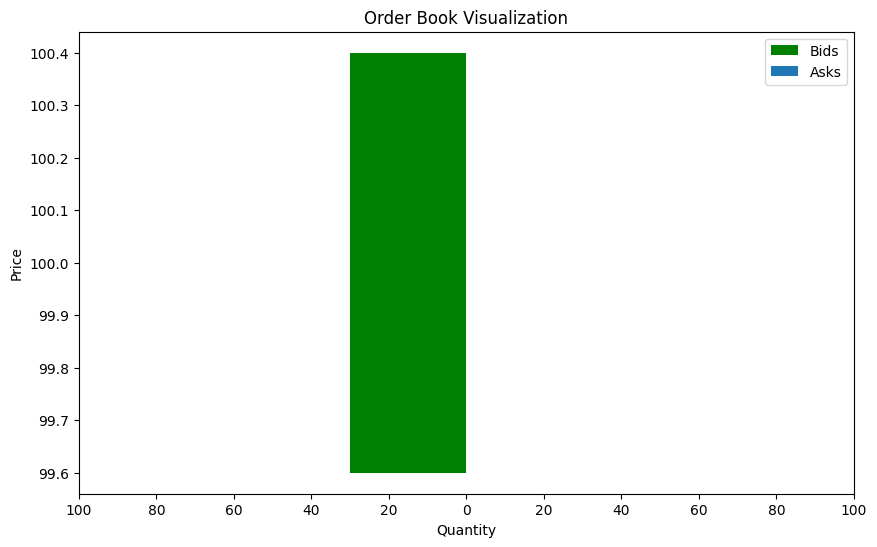

{100: 30}
{}
Order on buy side for 105 price of 30 quantity is added to orderbook.


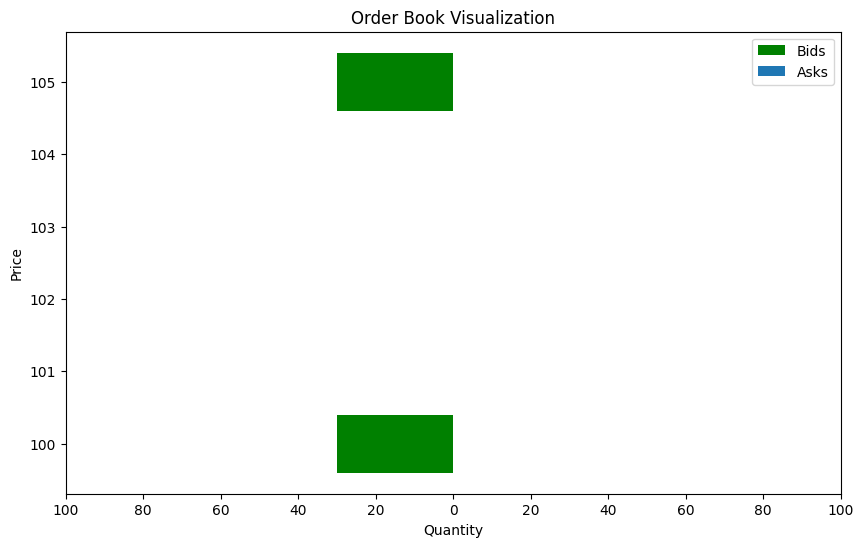

{100: 30, 105: 30}
{}
Order on buy side for 110 price of 30 quantity is added to orderbook.


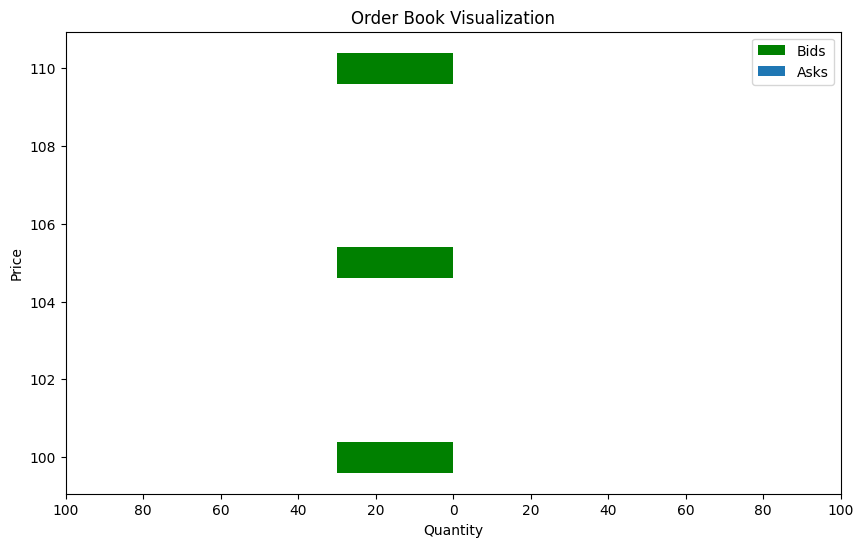

{100: 30, 105: 30, 110: 30}
{}
Order on buy side for 115 price of 30 quantity is added to orderbook.


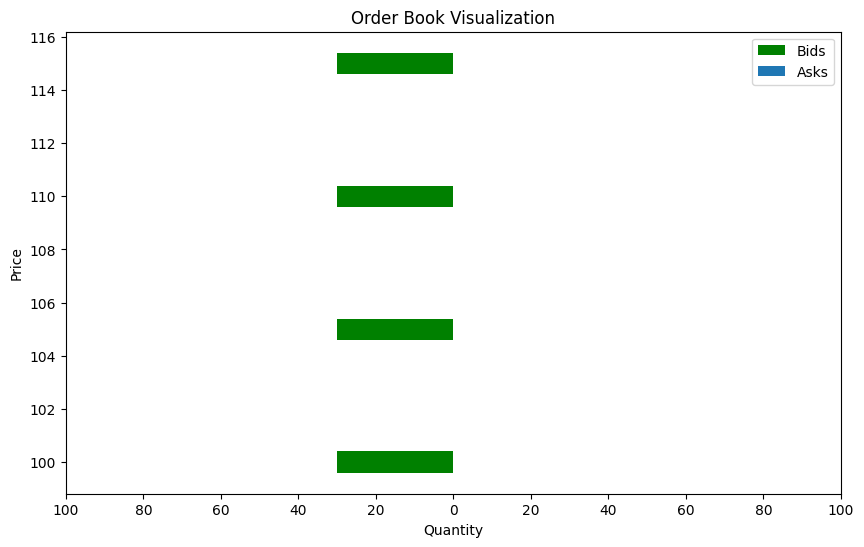

{100: 30, 105: 30, 110: 30, 115: 30}
{}
Order on buy side for 120 price of 30 quantity is added to orderbook.


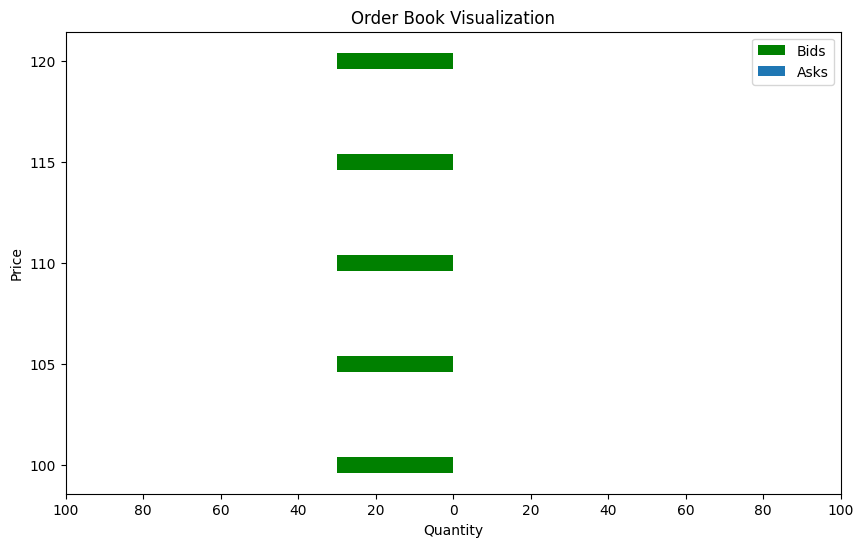

{100: 30, 105: 30, 110: 30, 115: 30, 120: 30}
{}
Order on sell side for 125 price of 20 quantity is added to orderbook.


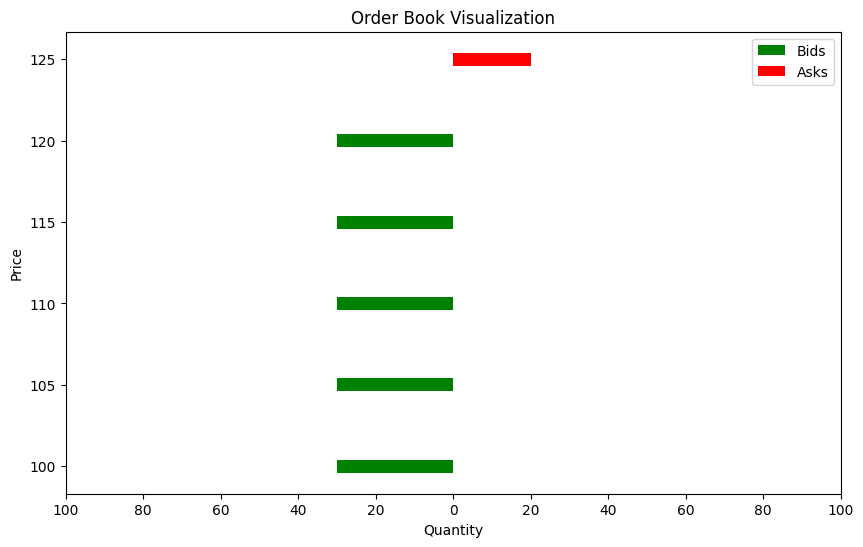

{100: 30, 105: 30, 110: 30, 115: 30, 120: 30}
{125: 20}
Order on sell side for 130 price of 20 quantity is added to orderbook.


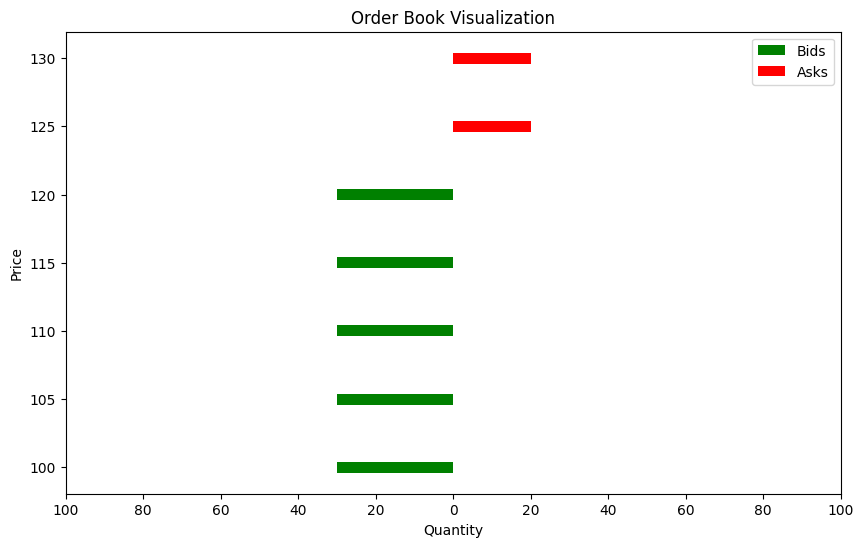

{100: 30, 105: 30, 110: 30, 115: 30, 120: 30}
{125: 20, 130: 20}
Order on sell side for 135 price of 20 quantity is added to orderbook.


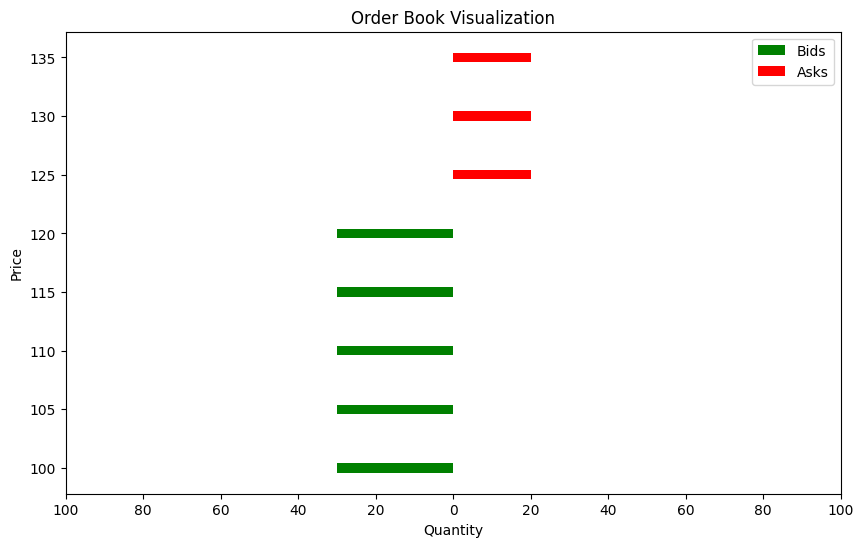

{100: 30, 105: 30, 110: 30, 115: 30, 120: 30}
{125: 20, 130: 20, 135: 20}
Order on sell side for 140 price of 20 quantity is added to orderbook.


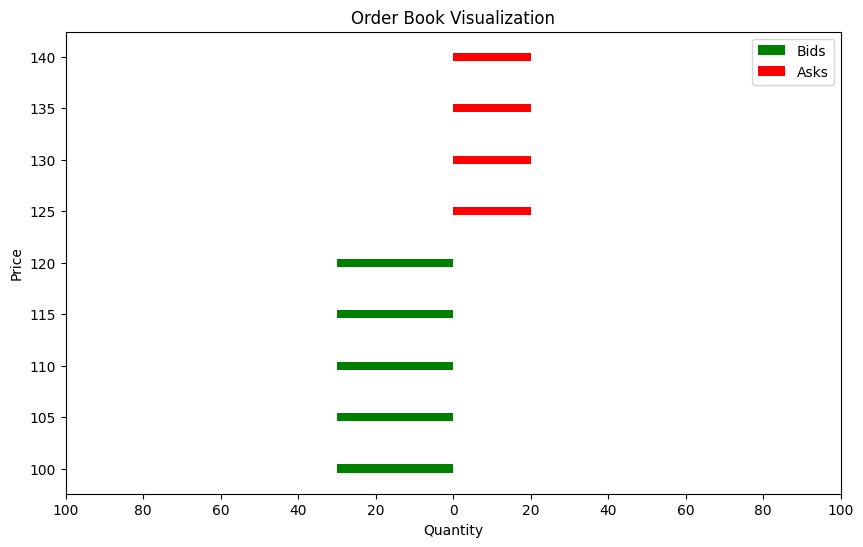

{100: 30, 105: 30, 110: 30, 115: 30, 120: 30}
{125: 20, 130: 20, 135: 20, 140: 20}
Order on sell side for 145 price of 20 quantity is added to orderbook.


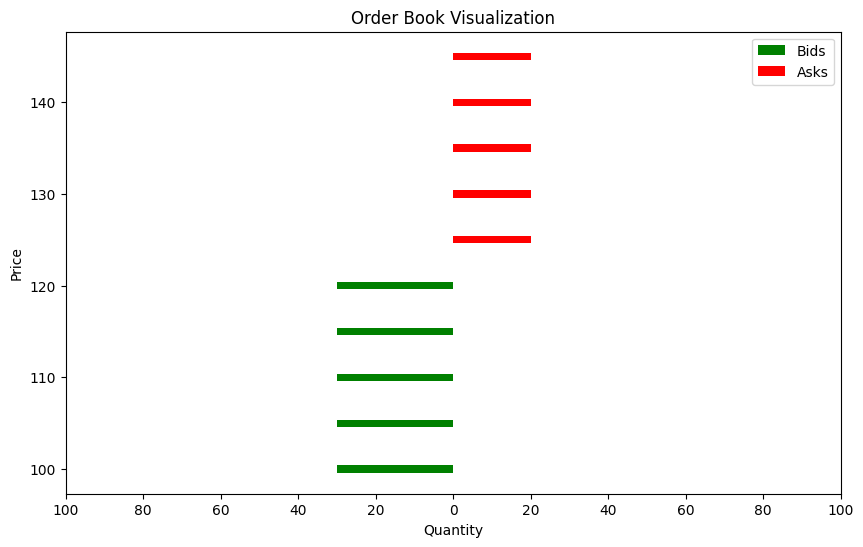

{100: 30, 105: 30, 110: 30, 115: 30, 120: 30}
{125: 20, 130: 20, 135: 20, 140: 20, 145: 20}


In [ ]:
ob.add_order('buy',100,30)
ob.visualizeOB()
print(ob.bids)
print(ob.asks)
ob.add_order('buy',105,30)
ob.visualizeOB()
print(ob.bids)
print(ob.asks)
ob.add_order('buy',110,30)
ob.visualizeOB()
print(ob.bids)
print(ob.asks)
ob.add_order('buy',115,30)
ob.visualizeOB()
print(ob.bids)
print(ob.asks)
ob.add_order('buy',120,30)
ob.visualizeOB()
print(ob.bids)
print(ob.asks)
ob.add_order('sell',125,20)
ob.visualizeOB()
print(ob.bids)
print(ob.asks)
ob.add_order('sell',130,20)
ob.visualizeOB()
print(ob.bids)
print(ob.asks)
ob.add_order('sell',135,20)
ob.visualizeOB()
print(ob.bids)
print(ob.asks)
ob.add_order('sell',140,20)
ob.visualizeOB()
print(ob.bids)
print(ob.asks)
ob.add_order('sell',145,20)
ob.visualizeOB()
print(ob.bids)
print(ob.asks)


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import numpy as np

# Initialize data containers
x_data = []
y_data = []

# Create a figure and axis
fig, ax = plt.subplots()
line, = ax.plot([], [], 'g-', label="Random Walk")  # Green line
ax.legend()

# Set axis limits
ax.set_xlim(0, 100)  # X-axis range
ax.set_ylim(-50, 50)  # Y-axis range
ax.set_title("Dynamic Random Walk")
ax.set_xlabel("Steps")
ax.set_ylabel("Value")

# Initialize function
def init():
    line.set_data([], [])
    return line,

# Update function
def update(frame):
    x_data.append(frame)
    y_data.append(y_data[-1] + np.random.randint(-5, 6) if y_data else 0)  # Random walk
    line.set_data(x_data, y_data)
    return line,

# Create animation
ani = FuncAnimation(
    fig, update, frames=range(100),  # Frames for animation
    init_func=init, blit=True
)

# Convert animation to HTML video for Colab
HTML(ani.to_jshtml())


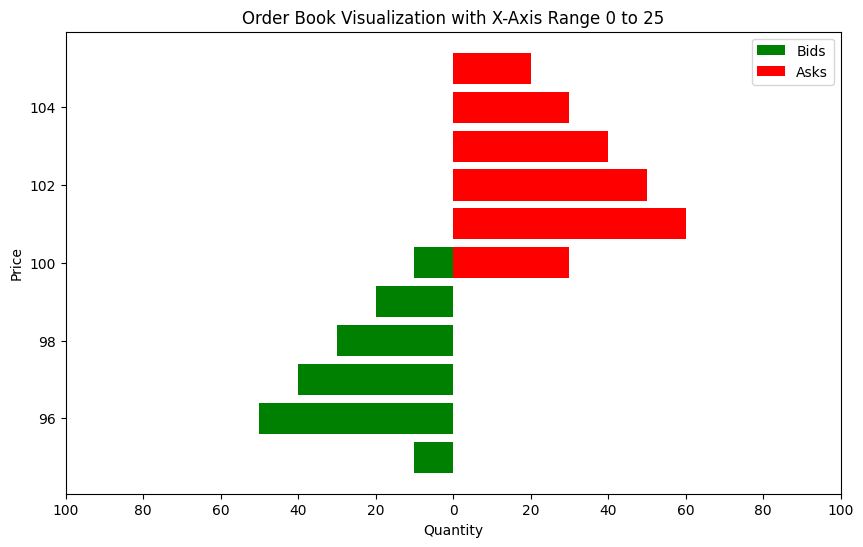

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample Order Book Data (Price and Quantity)
bids_prices = [100, 99, 98, 97, 96, 95]
bids_qty = [10, 20, 30, 40, 50, 10]

asks_prices = [101, 102, 103, 104, 105, 100]  # Notice 100 is a common price
asks_qty = [60, 50, 40, 30, 20, 30]  # Ask at 100 matches bid at 100

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bids (Buy orders) - left side of the plot (negative x-axis)
ax.barh(bids_prices, bids_qty, color='green', label="Bids", align='center', left=-np.array(bids_qty))

# Plot asks (Sell orders) - right side of the plot (positive x-axis)
ax.barh(asks_prices, asks_qty, color='red', label="Asks", align='center')

# Add a marker to indicate the matching price point
# matching_price = 100
# ax.plot([-bids_qty[bids_prices.index(matching_price)]], matching_price, 'ko', label="Matching Price", markersize=10)

# Set X-axis limit from 0 to 25, centered at 0
ax.set_xlim(-100, 100)

ax.set_xticks([-100, -80, -60, -40, -20, 0, 20, 40, 60, 80, 100])  # Custom tick positions on X-axis
ax.set_xticklabels([100, 80, 60, 40, 20, 0, 20, 40, 60, 80, 100])  # Custom labels

# Set labels
ax.set_xlabel("Quantity")
ax.set_ylabel("Price")
ax.set_title("Order Book Visualization with X-Axis Range 0 to 25")

# Add legend
ax.legend()

# Display the plot
plt.show()


In [ ]:
import plotly.graph_objects as go
import numpy as np
import time
from IPython.display import clear_output

# Initial order book data (Simulated)
bids_prices = [100, 99, 98, 97, 96]
bids_qty = [10, 20, 30, 40, 50]

asks_prices = [101, 102, 103, 104, 105]
asks_qty = [60, 50, 40, 30, 20]

# Create the figure
fig = go.Figure()

# Plot the initial bids and asks
fig.add_trace(go.Bar(
    x=bids_qty,
    y=bids_prices,
    orientation='h',
    name="Bids",
    marker=dict(color='green')
))

fig.add_trace(go.Bar(
    x=asks_qty,
    y=asks_prices,
    orientation='h',
    name="Asks",
    marker=dict(color='red')
))

# Set plot title and labels
fig.update_layout(
    title="Real-Time Order Book",
    xaxis_title="Quantity",
    yaxis_title="Price",
    barmode='stack',
    xaxis=dict(range=[0, 100]),  # Adjust x-axis limits
    yaxis=dict(range=[95, 110])  # Adjust y-axis limits
)

# Show the initial plot (in Colab, this will only show the plot once)
fig.show()

# Function to simulate new order book data and update the plot
for i in range(50):
    # Simulate new data by adding a small change
    new_bid_price = bids_prices[0] - np.random.randint(1, 3)
    new_ask_price = asks_prices[-1] + np.random.randint(1, 3)

    # Simulate quantity changes (random for this example)
    new_bid_qty = np.random.randint(5, 30)
    new_ask_qty = np.random.randint(5, 30)

    # Update the order book
    bids_prices.insert(0, new_bid_price)
    bids_qty.insert(0, new_bid_qty)

    asks_prices.append(new_ask_price)
    asks_qty.append(new_ask_qty)

    # Keep only the last 5 bid and ask levels to avoid growing too large
    if len(bids_prices) > 5:
        bids_prices.pop()
        bids_qty.pop()

    if len(asks_prices) > 5:
        asks_prices.pop(0)
        asks_qty.pop(0)

    # Update the plot with new data without generating a new plot
    fig.data[0].x = bids_qty  # Update bids data
    fig.data[0].y = bids_prices

    fig.data[1].x = asks_qty  # Update asks data
    fig.data[1].y = asks_prices

    # Clear output and redraw the plot to avoid stacking multiple figures
    clear_output(wait=True)

    # Redraw the plot
    fig.update_layout(
        title=f"Real-Time Order Book (Update {i+1})"
    )
    fig.show()

    # Wait for 1 second before the next update (simulate real-time update)
    time.sleep(1)


KeyboardInterrupt: 